<a href="https://colab.research.google.com/github/naisyahmh75/formula/blob/main/formula1_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Loading datasets from Kaggle

In [40]:
# Get the API file and upload to Colab

# Install the kaggle package
! pip install kaggle

# make a directory for the kaggle .json file
import os
os.makedirs("/content/.kaggle/", exist_ok = True)

# upload the kaggle.json file
from google.colab import files
#!mv kaggle.json /content/.kaggle/

# ensure the correct file permission
!chmod 600 /content/.kaggle/kaggle.json

chmod: cannot access '/content/.kaggle/kaggle.json': No such file or directory


In [42]:
# download the dataset using the Kaggle API
!kaggle datasets download -d rohanrao/formula-1-world-championship-1950-2020

Dataset URL: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020
License(s): CC0-1.0
formula-1-world-championship-1950-2020.zip: Skipping, found more recently modified local copy (use --force to force download)


In [43]:
# unzip
import zipfile

with zipfile.ZipFile("formula-1-world-championship-1950-2020.zip", "r") as zip_ref:
    zip_ref.extractall('formula1_data')

# list the files extracted
os.listdir('formula1_data')

['constructor_results.csv',
 'pit_stops.csv',
 'races.csv',
 'results.csv',
 'seasons.csv',
 'status.csv',
 'sprint_results.csv',
 'constructor_standings.csv',
 'driver_standings.csv',
 'constructors.csv',
 'drivers.csv',
 'lap_times.csv',
 'circuits.csv',
 'qualifying.csv']

In [44]:
import pandas as pd

# load the dataset
formula1_data = pd.read_csv('/content/formula1_data/circuits.csv')

# display the first 5 rows
formula1_data.head(10)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.73470,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco
6,7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,45.50000,-73.52280,13,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...
7,8,magny_cours,Circuit de Nevers Magny-Cours,Magny Cours,France,46.86420,3.16361,228,http://en.wikipedia.org/wiki/Circuit_de_Nevers...
8,9,silverstone,Silverstone Circuit,Silverstone,UK,52.07860,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
9,10,hockenheimring,Hockenheimring,Hockenheim,Germany,49.32780,8.56583,103,http://en.wikipedia.org/wiki/Hockenheimring


In [45]:
formula1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     int64  
 8   url         77 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ KB


In [46]:
formula1_data.describe()

,circuitId,lat,lng,alt
count,77.000000,77.000000,77.000000,77.000000
mean,39.883117,33.442925,1.076683,247.012987
std,23.001701,22.808866,65.516951,362.738469
min,1.000000,-37.849700,-118.189000,-7.000000
25%,20.000000,32.777400,-9.394170,18.000000
50%,40.000000,40.951700,3.930830,129.000000
75%,59.000000,46.958900,19.248600,332.000000
max,80.000000,57.265300,144.968000,2227.000000


- count: The number of non-missing values in each column.
- mean: The average value of each column.
- std: The standard deviation, which shows how spread out the data is.
- min: The minimum value in each column.
- 25%: The 25th percentile (first quartile).
- 50%: The 50th percentile (median).
- 75%: The 75th percentile (third quartile).
- max: The maximum value in each column.

<Axes: xlabel='alt', ylabel='lat'>

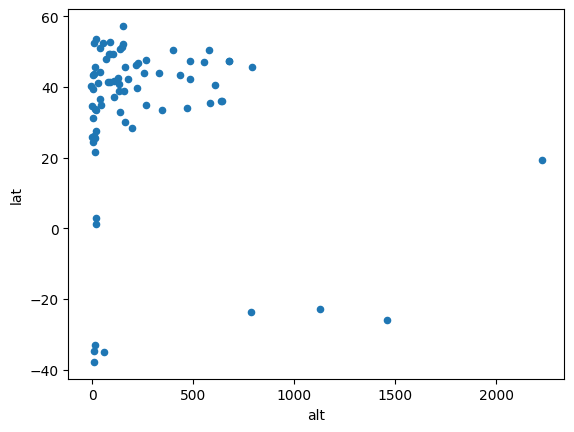

In [47]:
formula1_data.plot.scatter(x='alt', y='lat')

In [48]:
formula1_data['location'].unique()

array(['Melbourne', 'Kuala Lumpur', 'Sakhir', 'Montmeló', 'Istanbul',
       'Monte-Carlo', 'Montreal', 'Magny Cours', 'Silverstone',
       'Hockenheim', 'Budapest', 'Valencia', 'Spa', 'Monza', 'Marina Bay',
       'Oyama', 'Shanghai', 'São Paulo', 'Indianapolis', 'Nürburg',
       'Imola', 'Suzuka', 'Las Vegas', 'Abu Dhabi', 'Buenos Aires',
       'Jerez de la Frontera', 'Estoril', 'Okayama', 'Adelaide',
       'Midrand', 'Castle Donington', 'Mexico City', 'Phoenix',
       'Le Castellet', 'Yeongam County', 'Rio de Janeiro', 'Detroit',
       'Kent', 'Zandvoort', 'Heusden-Zolder', 'Dijon', 'Dallas',
       'California', 'Nevada', 'Madrid', 'New York State', 'Anderstorp',
       'Ontario', 'Barcelona', 'Brussels', 'Clermont-Ferrand', 'Quebec',
       'Rouen', 'Le Mans', 'Reims', 'Eastern Cape Province', 'Styria',
       'Liverpool', 'Oporto', 'Berlin', 'Lisbon', 'Florida', 'Casablanca',
       'Pescara', 'Bern', 'Uttar Pradesh', 'Austin', 'Spielberg', 'Sochi',
       'Baku', 'Portimão

In [49]:
x = formula1_data[formula1_data['country']=='USA']
x.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
18,19,indianapolis,Indianapolis Motor Speedway,Indianapolis,USA,39.7950,-86.2347,223,http://en.wikipedia.org/wiki/Indianapolis_Moto...
32,33,phoenix,Phoenix street circuit,Phoenix,USA,33.4479,-112.0750,345,http://en.wikipedia.org/wiki/Phoenix_street_ci...
36,37,detroit,Detroit Street Circuit,Detroit,USA,42.3298,-83.0401,177,http://en.wikipedia.org/wiki/Detroit_street_ci...
41,42,dallas,Fair Park,Dallas,USA,32.7774,-96.7587,139,http://en.wikipedia.org/wiki/Fair_Park
42,43,long_beach,Long Beach,California,USA,33.7651,-118.1890,12,"http://en.wikipedia.org/wiki/Long_Beach,_Calif..."


In [50]:
print(len(x))

11
